In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the Data 
train=pd.read_csv("D://LTFS//train.csv")
test=pd.read_csv("D://LTFS//test_bqCt9Pv.csv")

In [4]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


### Age 

In [ ]:
## Method 1
def calculateage(v):
    return pd.to_datetime('today').year-pd.to_datetime(v).year
def d(v):
    if v.split("-")[-1]=='00' or v.split("-")[-1]=='18':
        return "-".join(v.split("-")[:-1])+'-20'+"".join(v.split("-")[-1])
    else:
        return "-".join(v.split("-")[:-1])+'-19'+"".join(v.split("-")[-1])
train['Date.of.Birth']=pd.to_datetime(train['Date.of.Birth'].apply(d),format='%d-%m-%Y',errors='coerce')
train['age']=train['Date.of.Birth'].apply(calculateage)

In [ ]:
## Method 2
def calcAge(x):
    year = int(x.split('-')[2])
    if(year<=19):
        age = 20-year
    else:
        age = 100 + (20-year)
    return age
train['Age']=train['Date.of.Birth'].apply(calcAge)

In [ ]:
## Method 3
train['Date.of.Birth'] = np.where(train['Date.of.Birth'].dt.year < 2010
                                     ,train['Date.of.Birth']
                                     ,train['Date.of.Birth'] - pd.DateOffset(years=100)
                                    )
train['customer_age'] = round((train['DisbursalDate'] - train['Date.of.Birth']).dt.days / 365.2425)

In [ ]:
## Method 4
def format_date(col):
    temp = []
    for x in pd.to_datetime(col, format="%d-%m-%y"):
        if x > pd.to_datetime('today'):    temp.append(x - pd.DateOffset(years=100))
        else:                              temp.append(x)
    return temp
train['Date.of.Birth']  =  format_date(train['Date.of.Birth'])
train['Age__at_loan_disbursal']  =  train['DisbursalDate'] - train['Date.of.Birth']

In [ ]:
## Method 5
train['Date.of.Birth']=train['Date.of.Birth'].astype('datetime64[ns]')
a=train['Date.of.Birth'].dt.year.apply(lambda x: x if x<2018 else x-100).values
b=train['Date.of.Birth'].dt.month.values
c=train['Date.of.Birth'].dt.day.values
train['Date.of.Birth']=pd.to_datetime(dict(year=a,month=b,day=c))

### Disbursal Date and Date of Birth 

In [ ]:
## Method 1
train['DOB_day']    =  train['Date.of.Birth'].dt.day
train['DOB_month']  =  train['Date.of.Birth'].dt.month
train['DOB_year']   =  train['Date.of.Birth'].dt.year
train['DOB_dayofweek']   =  train['Date.of.Birth'].dt.dayofweek
train['Date.of.Birth_quarter'] = train['Date.of.Birth'].dt.quarter

train['DisbursalDate_day']    =  train['DisbursalDate'].dt.day
train['DisbursalDate_month']  =  train['DisbursalDate'].dt.month
train['DisbursalDate_year']   =  train['DisbursalDate'].dt.year
train['DisbursalDate_dayofweek']   =  train['DisbursalDate'].dt.dayofweek
train['DisbursalDate_quarter'] = train['DisbursalDate'].dt.quarter

In [ ]:
## Method 2 
def get_time_of_month_cat(date):
    if int(date) < 10:
        time_of_month = 'Beginning'
    elif int(date) >= 10 and int(date) < 20:
        time_of_month = 'Middle'
    else:
        time_of_month = 'End'
    return time_of_month
def get_end_of_month(date):
    if int(date) >= 25:
        end_of_month = 1
    else:
        end_of_month = 0
    return end_of_month
def datedata(df,col):
    import datetime as dt
    df[col]=df[col].astype('datetime64[ns]')
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['date'] = df[col].dt.day
    week=["Monday","Tuesday","Wednesday","Thrusday","Friday","Saturday","Sunday"]
    df['day'] = df[col].apply(lambda x: week[x.weekday()])
    y=dt.datetime(df[col].min().year,df[col].min().month,df[col].min().day)
    df['Abs_Dt']=df[col].apply(lambda x: (x-y).days)
    df['week_no']=df[col].dt.week
    df['Time_of_Month']=df['date'].apply(lambda x: get_time_of_month_cat(x))
    df['end_of_month']=df['date'].apply(lambda x: get_end_of_month(x))
    df['quarter']=df[col].dt.quarter
    df.rename(columns={'year':col+'_year','month':col+'_month','date':col+'_date','day':col+'_day','Abs_Dt':col+'_Abs_Dt','week_no':col+'_week_no','Time_of_Month':col+'_Time_of_Month','end_of_month':col+'_end_of_month','quarter':col+'_quarter'},inplace=True)
    df.drop(col,axis=1,inplace=True)
    return df
train=datedata(train,'Date.of.Birth')
train=datedata(train,'DisbursalDate')

### Credit History Length and Average Account Age

In [ ]:
## Method 1
train['AVERAGE.ACCT.AGE_year']=train['AVERAGE.ACCT.AGE'].apply(lambda x:re.match(r'([0-9]+)yrs ([0-9]+)mon',x).group(1))
train['AVERAGE.ACCT.AGE_month']=train['AVERAGE.ACCT.AGE'].apply(lambda x:re.match(r'([0-9]+)yrs ([0-9]+)mon',x).group(2))
train['AVERAGE.ACCT.AGE_year']=train['AVERAGE.ACCT.AGE_year'].astype(int)
train['AVERAGE.ACCT.AGE_month']=train['AVERAGE.ACCT.AGE_month'].astype(int)
train['AVERAGE.ACCT.AGE_total_in_month']=(train['AVERAGE.ACCT.AGE_month']+12*train['AVERAGE.ACCT.AGE_year'])

train['CREDIT.HISTORY.LENGTH_year']=train['CREDIT.HISTORY.LENGTH'].apply(lambda x:re.match(r'([0-9]+)yrs ([0-9]+)mon',x).group(1))
train['CREDIT.HISTORY.LENGTH_month']=train['CREDIT.HISTORY.LENGTH'].apply(lambda x:re.match(r'([0-9]+)yrs ([0-9]+)mon',x).group(2))
train['CREDIT.HISTORY.LENGTH_year']=train['CREDIT.HISTORY.LENGTH_year'].astype(int)
train['CREDIT.HISTORY.LENGTH_month']=train['CREDIT.HISTORY.LENGTH_month'].astype(int)
train['CREDIT.HISTORY.LENGTH_total_in_month']=train['CREDIT.HISTORY.LENGTH_month']*12+train['CREDIT.HISTORY.LENGTH_year']


In [ ]:
## Method 2 
train['acct_age']=train['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))
train['AVERAGE.ACCT.AGE.YEAR']=train['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[0][:-3]))
train['AVERAGE.ACCT.AGE.MONTH']=train['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[1][:-3]))

train['credit_history_len']=train['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))
train['CREDIT.HISTORY.LENGTH.YEAR']=train['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3]))
train['CREDIT.HISTORY.LENGTH.MONTH']=train['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[1][:-3]))

In [ ]:
## Method 3
def AvgAcctAge(x):
    year = int(x.split(" ")[0].split("y")[0])
    month = int(x.split(" ")[1].split("m")[0])
    time_int = (12*year) + month
    return time_int

train["AvgAcctAge"] = train['AVERAGE.ACCT.AGE'].apply(AvgAcctAge)
train['CredAcctAge'] = train['CREDIT.HISTORY.LENGTH'].apply(AvgAcctAge)

In [ ]:
## Method 4
def get_num_months(x):
    x = str(x).split()
    yr = int(x[0].replace("yrs",""))
    mnth = int(x[1].replace("mon",""))
    return ((yr*12) + mnth)

for col in ["AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH"]:
    train_df[col] = train_df[col].apply(lambda x: get_num_months(x))
    test_df[col] = test_df[col].apply(lambda x: get_num_months(x))

In [ ]:
## Method 5
df['AVERAGE.ACCT.AGE'] = pd.to_numeric(df['AVERAGE.ACCT.AGE'].str.replace(r'(\d+).*(\d+).*', lambda x: '{}.{:0>2}'.format(x[1], x[2])), errors='coerce')
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: (math.modf(x)[0]*6)+math.modf(x)[1])
df['CREDIT.HISTORY.LENGTH'] = pd.to_numeric(df['CREDIT.HISTORY.LENGTH'].str.replace(r'(\d+).*(\d+).*', lambda x: '{}.{:0>2}'.format(x[1], x[2])), errors='coerce')
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: (math.modf(x)[0]*6)+math.modf(x)[1])

In [ ]:
## Method 6
def calculate_months_from_strings(text):
    number_list = [int(s) for s in re.findall(r'\d+', text)]
    result = []
    for i in range(0,len(number_list)):
        if (i == 0):
            result.append(number_list[i] * 12)
        else:
            result.append(number_list[i])
    output = sum(result)
    return output

train['AVERAGE.ACCT.AGE'] = train['AVERAGE.ACCT.AGE'].apply(calculate_months_from_strings)
train['CREDIT.HISTORY.LENGTH'] = train['CREDIT.HISTORY.LENGTH'].apply(calculate_months_from_strings)

### Perform CNS Score Description

In [ ]:
## Method 1
train['PERFORM_CNS.SCORE.BINS']=pd.cut(train['PERFORM_CNS.SCORE'],5,labels=['Slim','Doubtful','Fair','Good','Great']).astype(np.object)
train['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk','A-Very Low Risk':'Very Low Risk','D-Very Low Risk':'Very Low Risk','B-Very Low Risk':'Very Low Risk',
'M-Very High Risk':'Very High Risk','L-Very High Risk':'Very High Risk',
                                               'F-Low Risk':'Low Risk','E-Low Risk':'Low Risk',
                                               'H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                               'J-High Risk':'High Risk','K-High Risk':'High Risk'},inplace=True)
train['Not_Scored']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
train['Very_Low']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low'),1,0)
train['Very_High']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
train['No_History']=np.where(train['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)

In [ ]:
## Method 2
def CIBIL_norm(x):
    a=''
    if((x=='A-Very Low Risk') or (x=='B-Very Low Risk') or (x=='C-Very Low Risk') or (x=='D-Very Low Risk')):
        a = 'Very Low Risk'
    elif((x=='M-Very High Risk')):
        a = 'Very Very High Risk'
    elif((x=='L-Very High Risk')):
        a='Very High Risk'
    elif((x=='E-Low Risk') or (x=='F-Low Risk') or (x=='G-Low Risk')):
        a = 'Low Risk'
    elif((x=='H-Medium Risk') or (x=='I-Medium Risk')):
        a = 'Medium Risk'
    elif((x=='J-High Risk') or (x=='K-High Risk')):
        a = 'High Risk'
    elif((x=='Not Scored: No Activity seen on the customer (Inactive)') or (x=='Not Scored: No Updates available in last 36 months')):
        a = 'Inactive'
    elif((x=='Not Scored: Only a Guarantor')):
        a='Guarantor'
    elif((x=='Not Scored: More than 50 active Accounts found')):
        a='SuperActive'
    else:
        a='Others'
    return a

def CIBIL_other(x):
    a=''
    if((x=='A-Very Low Risk') or (x=='B-Very Low Risk') or (x=='C-Very Low Risk') or (x=='D-Very Low Risk')):
        a = 'Very Low Risk'
    elif((x=='M-Very High Risk')):
        a = 'Very Very High Risk'
    elif((x=='L-Very High Risk')):
        a='Very High Risk'
    elif((x=='E-Low Risk') or (x=='F-Low Risk') or (x=='G-Low Risk')):
        a = 'Low Risk'
    elif((x=='H-Medium Risk') or (x=='I-Medium Risk')):
        a = 'Medium Risk'
    elif((x=='J-High Risk') or (x=='K-High Risk')):
        a = 'High Risk'
    elif((x=='Not Scored: No Activity seen on the customer (Inactive)') or (x=='Not Scored: No Updates available in last 36 months')):
        a = 'Inactive'
    elif((x=='Not Scored: Only a Guarantor')):
        a='Guarantor'
    elif((x=='Not Scored: More than 50 active Accounts found')):
        a='SuperActive'
    elif((x=='No Bureau History Available') or (x=='Not Scored: Sufficient History Not Available') or (x=='Not Scored: Not Enough Info available on the customer')):  
        a='NoHistory'
    else:
        a='Others'
    return a

train['CIBIL_Descr'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(CIBIL_norm)
train['CIBIL_Other'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(CIBIL_other)

In [ ]:
## Method 3
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].map({'No Bureau History Available':6,  
    'I-Medium Risk':9,  'L-Very High Risk':12, 
'A-Very Low Risk':1, 
    'Not Scored: Not Enough Info available on the customer':6, 
'D-Very Low Risk':4,  'M-Very High Risk':13,  'B-Very Low Risk':2,  'C-Very Low Risk':3, 
'E-Low Risk':5,  'H-Medium Risk':8,  'F-Low Risk':6,  'K-High Risk':11, 
'Not Scored: No Activity seen on the customer (Inactive)':6, 
'Not Scored: Sufficient History Not Available':6, 
'Not Scored: No Updates available in last 36 months':6,  'G-Low Risk':7, 
'J-High Risk':10,  'Not Scored: Only a Guarantor':6, 
'Not Scored: More than 50 active Accounts found':10 })

In [ ]:
## Method 4 
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='No Bureau History Available') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Sufficient History Not Available') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Not Enough Info available on the customer') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: No Activity seen on the customer (Inactive)') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: No Updates available in last 36 months') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: Only a Guarantor') else x )
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].apply(lambda x: 'No Info' if (x=='Not Scored: More than 50 active Accounts found') else x )

In [ ]:
## Method 5
PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict  =  {'A-Very Low Risk':0.05, 
                                             'B-Very Low Risk':0.1, 
                                             'C-Very Low Risk':0.3, 
                                             'D-Very Low Risk':0.8, 
                                             
                                             'E-Low Risk':1.1, 
                                             'F-Low Risk':1.4, 
                                             'G-Low Risk':1.8, 
                                             
                                             'H-Medium Risk':2.7,
                                             'I-Medium Risk':3.9,
                                             
                                             'J-High Risk':5,
                                             'K-High Risk':6,
                                             
                                             'L-Very High Risk':7.5,
                                             'M-Very High Risk':10}    # Weights.

count_of_AtoM  =  sum([count__PERFORM_CNS_SCORE_DESCRIPTION__Dict[i]     for i in PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict])
count__PERFORM_CNS_SCORE_DESCRIPTION__Dict____minus____PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict  =  [i  for i in count__PERFORM_CNS_SCORE_DESCRIPTION__Dict  if i not in PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict]

# Weighted Average
weighted_avg =  sum([PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i] * (count__PERFORM_CNS_SCORE_DESCRIPTION__Dict[i]/count_of_AtoM)  for i in PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict])
for i in count__PERFORM_CNS_SCORE_DESCRIPTION__Dict____minus____PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict:
        PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i]  =  weighted_avg

df['PERFORM_CNS.SCORE.DESCRIPTION__Weighted_Average'] = [PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i]  for i in df['PERFORM_CNS.SCORE.DESCRIPTION']]

# Average
_avg   =  sum([PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i]   for i in PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict]) / len(PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict)
for i in count__PERFORM_CNS_SCORE_DESCRIPTION__Dict____minus____PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict:
        PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i]  =  _avg

df['PERFORM_CNS.SCORE.DESCRIPTION__Average'] = [PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i]  for i in df['PERFORM_CNS.SCORE.DESCRIPTION']]


# Categorical
PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict  =  dict((value, key) for (key, value) in enumerate(sorted(df['PERFORM_CNS.SCORE.DESCRIPTION'].unique())))
df['PERFORM_CNS.SCORE.DESCRIPTION__Categorical'] = [PERFORM_CNS_SCORE_DESCRIPTION__LE__Dict[i]  for i in df['PERFORM_CNS.SCORE.DESCRIPTION']]


### Perform CNS Score 

In [ ]:
def CIBIL_trend(x):
    a=''
    if(x==300):
        a='Very Poor'
    elif((x>300) and (x<=550)):
        a='Poor'
    elif((x>550) and (x<=650)):
        a='Fair'
    elif((x>650) and (x<=750)):
        a='Good'
    elif((x>750) and (x<=900)):
        a='Excellent'
    else:
        a='Others'
    return a
train['CIBIL_Trend'] = train['PERFORM_CNS.SCORE'].apply(CIBIL_trend)
train['PERFORM_CNS.SCORE'] = np.where(train['PERFORM_CNS.SCORE']==11,0,train['PERFORM_CNS.SCORE'])
train['PERFORM_CNS.SCORE'] = np.where(train['PERFORM_CNS.SCORE']==14,0,train['PERFORM_CNS.SCORE'])
train['PERFORM_CNS.SCORE'] = np.where(train['PERFORM_CNS.SCORE']==15,0,train['PERFORM_CNS.SCORE'])
train['PERFORM_CNS.SCORE'] = np.where(train['PERFORM_CNS.SCORE']==16,0,train['PERFORM_CNS.SCORE'])
train['PERFORM_CNS.SCORE'] = np.where(train['PERFORM_CNS.SCORE']==17,0,train['PERFORM_CNS.SCORE'])
train['PERFORM_CNS.SCORE'] = np.where(train['PERFORM_CNS.SCORE']==18,0,train['PERFORM_CNS.SCORE'])

### Features based on Primary and Secondary Accounts

In [ ]:
train["PRI.Total.loan"] = train["PRI.CURRENT.BALANCE"] + train["PRI.SANCTIONED.AMOUNT"]
train['total_accounts'] = train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']
train['total_install_amt'] = train['PRIMARY.INSTAL.AMT'] + train['SEC.INSTAL.AMT']
train['Total.ACTIVE.ACCTS'] = train['PRI.ACTIVE.ACCTS'] + train['SEC.ACTIVE.ACCTS']
train['TOT.CURRENT.BALANCE'] = train['PRI.CURRENT.BALANCE'] + train['SEC.CURRENT.BALANCE']
train['TOT.DISBURSED.AMOUNT'] = train['PRI.DISBURSED.AMOUNT'] + train['SEC.DISBURSED.AMOUNT']
train['Total.OVERDUE.ACCTS'] = train['PRI.OVERDUE.ACCTS'] + train['SEC.OVERDUE.ACCTS']
train['Total.SANCTIONED.AMOUNT'] = train['PRI.SANCTIONED.AMOUNT'] + train['SEC.SANCTIONED.AMOUNT']
train['PriOverduePercentage'] = np.where(train['PRI.NO.OF.ACCTS'] != 0,train['PRI.OVERDUE.ACCTS'] / train['PRI.NO.OF.ACCTS'],-1)

train['instalment_flag'] = np.where(np.logical_and(train['PRIMARY.INSTAL.AMT'] > 0, train['SEC.INSTAL.AMT'] > 0),1,0)
train['outstanding_now'] = train['PRI.CURRENT.BALANCE'] + train['disbursed_amount']
train['disbursed_amount_by_PRI_EMI'] = train['disbursed_amount'] / train['PRIMARY.INSTAL.AMT']
train['PRI.NO.OF.ACCTS.Deacti'] = train['PRI.NO.OF.ACCTS'] - train['PRI.ACTIVE.ACCTS']
train['loan_paid_PRI'] = train['PRI.DISBURSED.AMOUNT'] - train['PRI.CURRENT.BALANCE']
train["total_sanctioned"] = (train["SEC.SANCTIONED.AMOUNT"] + train["SEC.SANCTIONED.AMOUNT"]).clip(0, 1e9)
train['SecOverduePercentage'] = np.where(train['SEC.NO.OF.ACCTS'] != 0,train['SEC.OVERDUE.ACCTS'] / train['SEC.NO.OF.ACCTS'],-1)
train['SECcritRatio'] = np.where(train['SEC.DISBURSED.AMOUNT'] != 0,train['SEC.CURRENT.BALANCE'] / train['SEC.DISBURSED.AMOUNT'],-1)
train['TOTcritRatio'] = np.where(train['TOT.DISBURSED.AMOUNT'] != 0,train['TOT.CURRENT.BALANCE'] / train['TOT.DISBURSED.AMOUNT'],-1)
train['disbursed_amount_by_SEC_EMI'] = train['disbursed_amount'] / train['SEC.INSTAL.AMT']
train['SEC.NO.OF.ACCTS.Deacti'] = train['SEC.NO.OF.ACCTS'] - train['SEC.ACTIVE.ACCTS']
train['loan_paid_Sec'] = train['SEC.DISBURSED.AMOUNT'] - train['SEC.CURRENT.BALANCE']
train['SANCTION_DISBURSED']=train['Total.SANCTIONED.AMOUNT'] - train['TOT.DISBURSED.AMOUNT']
train['NO_DEACTIVE_ACCOUNTS'] = train['total_accounts'] - train['Total.ACTIVE.ACCTS']
train['NO.OF.ACC.BEF.SIX.MONTH'] = train['total_accounts'] - train['NEW.ACCTS.IN.LAST.SIX.MONTHS']
train['CLEAN.ACC'] = train['total_accounts'] - (train['Total.ACTIVE.ACCTS'] + train['Total.OVERDUE.ACCTS'])
train['asset_value'] = train['disbursed_amount'] * (train['ltv']/100)
train['value_cost'] = train['asset_cost'] - train['asset_value']
train['value_per_cost'] = train['value_cost'] / train['asset_value']
train['extra_finance'] = train['asset_cost'] * (train['ltv']/100) - train['disbursed_amount']
train['asset_disburse'] = (train['asset_cost'] - train['disbursed_amount']) / train['disbursed_amount']
train['sixmmonths_trainault'] = train['NEW.ACCTS.IN.LAST.SIX.MONTHS'] - train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
train['disbursed_tot'] = train['disbursed_amount'] + train['PRI.DISBURSED.AMOUNT']
train['out_to_dsbrsd'] = train['outstanding_now'] / train['disbursed_tot']
train['dis_as_share'] = train['asset_cost'] / train['disbursed_amount']
train['diff_ltv_'] = train['dis_as_share'] - train['ltv']
train['isStudent'] = np.where(train['Age']<=25,1,0)
train['isSenior'] = np.where(train['Age']>=60,1,0)
train['ass_by_ltv'] = train['asset_cost'] / train['ltv']
# df['AVERAGE.ACCT.AGE'] = pd.to_numeric(df['AVERAGE.ACCT.AGE'].str.replace(r'(\d+).*(\d+).*', lambda x: '{}.{:0>2}'.format(x[1], x[2])), errors='coerce')
# df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: (math.modf(x)[0]*6)+math.modf(x)[1])
train['avg_instalment'] = np.where(train['AVERAGE.ACCT.AGE'] > 0,train['TOT.DISBURSED.AMOUNT']/train['AVERAGE.ACCT.AGE'],train['AVERAGE.ACCT.AGE'])
train['more_instalment_flag'] = np.where(train['total_install_amt'] > train['avg_instalment'], 1, 0)
train['same_sanctioned_flag'] = np.where(train['Total.SANCTIONED.AMOUNT'] == train['TOT.DISBURSED.AMOUNT'],True,False)
train['avg_disbursed_amt'] = np.where(train['total_accounts'] > 0,train['TOT.DISBURSED.AMOUNT']/train['total_accounts'],train['total_accounts'])
train['more_disbursed_flag'] = np.where(train['disbursed_amount'] > train['avg_disbursed_amt'], 1, 0)
train['disbursed_amt_diff'] = train['disbursed_amount'] - train['avg_disbursed_amt']
# df['CREDIT.HISTORY.LENGTH'] = pd.to_numeric(df['CREDIT.HISTORY.LENGTH'].str.replace(r'(\d+).*(\d+).*', lambda x: '{}.{:0>2}'.format(x[1], x[2])), errors='coerce')
# df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: (math.modf(x)[0]*6)+math.modf(x)[1])
train['young_risk_cust'] = np.where(np.logical_and(train['Age'] < 25,train['CREDIT.HISTORY.LENGTH'] == 0),True,False)
train['overdue_ratio'] = np.where(train['total_accounts'] > 0,train['Total.OVERDUE.ACCTS']/train['total_accounts'],train['total_accounts'])
train['active_ratio'] = np.where(np.logical_and(train['Total.ACTIVE.ACCTS'] > 0, train['Total.ACTIVE.ACCTS'] > 0),(train['Total.ACTIVE.ACCTS'] - train['Total.OVERDUE.ACCTS'])/train['total_accounts'],0)
train['active_ratio'] = np.clip(train['active_ratio'], a_min=0, a_max = 1)
train['success_ratio'] = np.where(train['total_accounts'] == train['Total.ACTIVE.ACCTS'],0,np.where(train['total_accounts'] > 0
                                              ,(train['total_accounts'] - train['Total.ACTIVE.ACCTS'])/train['total_accounts'],train['total_accounts']))
train['instalment_flag'] = np.where(np.logical_and(train['PRIMARY.INSTAL.AMT'] > 0
                                                    , train['SEC.INSTAL.AMT'] > 0),1,0)
train['paid_percent'] = np.where(train['TOT.DISBURSED.AMOUNT'] > 0,(train['TOT.DISBURSED.AMOUNT'] - train['TOT.CURRENT.BALANCE'])/ 
                                 train['TOT.DISBURSED.AMOUNT'],train['TOT.DISBURSED.AMOUNT'])
train['instalment_ratio'] = np.where(train['TOT.CURRENT.BALANCE'] > 0,train['total_install_amt']/train['TOT.CURRENT.BALANCE']
                                              ,train['TOT.CURRENT.BALANCE'])
train['recent_bad_accnt_flag'] = np.where(train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] > 0, 1, 0)
train['recent_open_accnt_flag'] = np.where(train['NEW.ACCTS.IN.LAST.SIX.MONTHS'] > 0, 1, 0)
train['inquire_flag'] = np.where(train['NO.OF_INQUIRIES'] > 0, 1, 0)
train['id_score'] = (train['Aadhar_flag'] + train['PAN_flag'] + train['VoterID_flag'] + 
                        train['Driving_flag'] + train['Passport_flag'])
train['dtv'] = round(100*train['disbursed_amount']/train['asset_cost'],2)
train['diff_ltv_dtv'] = train['ltv'] - train['dtv']
train['high_loan_flag'] = np.where(train['loan_amt'] > train['disbursed_amount'], 1, 0)
train['totalDefaultPercent'] = np.where((train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']) != 0,(train['PRI.OVERDUE.ACCTS'] + train['SEC.OVERDUE.ACCTS'])/(train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']),-1)

### Some unique features from each Kernel 

#### Anomalous Branch 

In [ ]:
branchList = train['branch_id'].unique()
branchSupId = train.groupby('branch_id')['supplier_id'].unique()
branchSupIdList = []
anomalousBranch = []
for bra in range(len(branchList)):
    branchId = branchList[bra]
    branchSupIdList.append(branchSupId[branchId])

for i in range(len(branchSupIdList)):
    for j in range(len(branchSupIdList)):
        if(i != j):
                #print(len(list(set(branchSupIdList[i]).intersection(set(branchSupIdList[j])))))
                if ((len(list(set(branchSupIdList[i]).intersection(set(branchSupIdList[j]))))) != 0):  
                    if (len(list(set(branchSupIdList[i]).intersection(set(branchSupIdList[j]))))) >= 3:  
                          #Both branches in the same locality.
                            continue
                    else:
                        anomalousBranch.append(branchList[i])
                else:#Disjoint Branches
                    continue
        else:
            continue 

def isBranchAnomalous(x):
    if (x in anomalousBranch):
        return 1
    else:
        return 0
train['isBranchAnomalous'] = train['branch_id'].apply(lambda x: isBranchAnomalous(x))

#### Current_Outstanding

In [ ]:
# Defining a new feature based on the Number of outstanding Balance accounts the customer has.
# The idea behind this being, more the number of accounts a customer has with outstanding balance, the less reliable he would be expected to be.
def CurrOutstandingBal(x):
    a=''
    if (x==0):
        a='Good'
    elif((x<0) and (x!=-1)):
        a='Very Good'
    elif(x>0 and x<=1):
        a='Both'
    elif(x>1):
        a='Problematic'
    else:
        a='Other'
    return a

# train['PRIcritRatio'] = np.where(train['PRI.DISBURSED.AMOUNT'] != 0,train['PRI.CURRENT.BALANCE'] / train['PRI.DISBURSED.AMOUNT'],-1)
train['PriRatioRemark'] = train['PRIcritRatio'].apply(lambda x: CurrOutstandingBal(x))

# train['SECcritRatio'] = np.where(train['SEC.DISBURSED.AMOUNT'] != 0,train['SEC.CURRENT.BALANCE'] / train['SEC.DISBURSED.AMOUNT'],-1)
train['SecRatioRemark'] = train['SECcritRatio'].apply(lambda x: CurrOutstandingBal(x))

# train['TOTcritRatio'] = np.where(train['TOT.DISBURSED.AMOUNT'] != 0,train['TOT.CURRENT.BALANCE'] / train['TOT.DISBURSED.AMOUNT'],-1)
train['TotRatioRemark'] = train['TOTcritRatio'].apply(lambda x: CurrOutstandingBal(x))

#### Prime Default

In [ ]:
def PrimaDefault(x):
    a=''
    if(x==-1):
        a='First'
    elif(x==0):
        a='Great'
    elif(x<=0.2):
        a='Normal'
    elif(x<=0.4):
        a='Bothersome'
    elif(x<=0.6):
        a='Trouble'
    elif(x<=0.8):
        a='Danger'
    else:
        a='High Alert'
    return a
# PriOverduePercentage'] = np.where(train['PRI.NO.OF.ACCTS'] != 0,train['PRI.OVERDUE.ACCTS'] / train['PRI.NO.OF.ACCTS'],-1)
train['PrimaDefaultRemark'] = train['PriOverduePercentage'].apply(lambda x: PrimaDefault(x))

#### Secondary Default

In [ ]:
def SecDefault(x):
    a=''
    if(x==-1):
        a='First'
    elif(x==0):
        a='Great'
    elif(x<=0.2):
        a='Normal'
    elif(x<=0.4):
        a='Bothersome'
    elif(x<=0.6):
        a='Trouble'
    elif(x<=0.8):
        a='Danger'
    else:
        a='High Alert'
    return a

# train['SecOverduePercentage'] = np.where(train['SEC.NO.OF.ACCTS'] != 0,train['SEC.OVERDUE.ACCTS'] / train['SEC.NO.OF.ACCTS'],-1)
train['SecoDefaultRemark'] = train['SecOverduePercentage'].apply(lambda x: SecDefault(x))

#### Total Default

In [ ]:
def TotDefault(x):
    a=''
    if(x==-1):
        a='First'
    elif(x==0):
        a='Great'
    elif(x<=0.2):
        a='Normal'
    elif(x<=0.4):
        a='Bothersome'
    elif(x<=0.6):
        a='Trouble'
    elif(x<=0.8):
        a='Danger'
    else:
        a='High Alert'
    return a

# train['totalDefaultPercent'] = np.where((train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']) != 0,(train['PRI.OVERDUE.ACCTS'] + train['SEC.OVERDUE.ACCTS'])/(train['PRI.NO.OF.ACCTS'] + train['SEC.NO.OF.ACCTS']),-1)
train['TotaDefaultRemark'] = train['totalDefaultPercent'].apply(lambda x: TotDefault(x)) 

#### Default in Last Six Months

In [ ]:
def PrimaDefaultLastSix(x):
    a=''
    if(x==0):
        a='Great'
    elif(x==1):
        a='Normal'
    elif(x==2):
        a='Bothersome'
    elif(x>=3):
        a='Trouble'
    else:
        a='Others'
    return a

train['AcctsLastSixRemarks'] = train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x : PrimaDefaultLastSix(x))

### Features based on Groupby Method 

In [ ]:
for col1, col2 in [["asset_cost", "disbursed_amount"],
                   ["PRI.DISBURSED.AMOUNT", "PRI.CURRENT.BALANCE"],
                  ]:
    train[col1 + "_diff_" + col2] = train[col1] - train[col2]


for col1, col2 in [["PRI.CURRENT.BALANCE", "PRI.DISBURSED.AMOUNT"],
                   ["PRI.DISBURSED.AMOUNT", "PRI.SANCTIONED.AMOUNT"],
                   ["AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH"],
                   ["PRI.ACTIVE.ACCTS", "PRI.NO.OF.ACCTS"],
                   ["PRI.OVERDUE.ACCTS", "PRI.ACTIVE.ACCTS"],
                   ["PRI.OVERDUE.ACCTS", "PRI.NO.OF.ACCTS"]]:
    train[col1+"_ratio_"+col2] = train[col1] / train[col2]


for col in ["Current_pincode_ID", "Employee_code_ID", "supplier_id", "branch_id", "ltv", 
            ["supplier_id", "branch_id"], ["supplier_id", "Employee_code_ID"],
            ["manufacturer_id", "branch_id"], ["manufacturer_id", "Employee_code_ID"],
            ["Employment.Type", "Employee_code_ID"], ["Employment.Type", "branch_id"],
            ["PERFORM_CNS.SCORE.DESCRIPTION", "Employee_code_ID"],
            ["Current_pincode_ID", "Employee_code_ID"]]:
    if not isinstance(col, list):
        col = [col]
    col_name = "_".join(col)
    all_df = pd.concat([train[["UniqueID"]+ col], test[["UniqueID"]+ col]])
    gdf = all_df.groupby(col)["UniqueID"].count().reset_index()
    gdf.columns = col + [col_name+"_count"]
    train = pd.merge(train, gdf, on=col, how="left")
       
for col in ["Current_pincode_ID", "Employee_code_ID", "supplier_id"]:
    if not isinstance(col, list):
        col = [col]
    col_name = "_".join(col)
    all_df = pd.concat([train[["ltv"]+ col], test[["ltv"]+ col]])
    gdf = all_df.groupby(col)["ltv"].agg(["mean", "std", "max"]).reset_index()
    gdf.columns = col + [col_name+"_ltv_mean", col_name+"_ltv_std", col_name+"_ltv_max"]
    train = pd.merge(train, gdf, on=col, how="left")


for col in ["Current_pincode_ID", "Employee_code_ID"]:
    if not isinstance(col, list):
        col = [col]
    col_name = "_".join(col)
    all_df = pd.concat([train[["PERFORM_CNS.SCORE"]+ col], test[["PERFORM_CNS.SCORE"]+ col]])
    gdf = all_df.groupby(col)["PERFORM_CNS.SCORE"].agg(["mean", "std"]).reset_index()
    gdf.columns = col + [col_name+"_performance_mean", col_name+"_performance_std"]
    train = pd.merge(train, gdf, on=col, how="left")
    
    all_df = pd.concat([train[["Date.of.Birth_in_seconds"]+ col], test[["Date.of.Birth_in_seconds"]+ col]])
    gdf = all_df.groupby(col)["Date.of.Birth_in_seconds"].agg(["mean", "std"]).reset_index()
    gdf.columns = col + [col_name+"_dob_mean", col_name+"_dob_std"]
    train = pd.merge(train, gdf, on=col, how="left")
    
    all_df = pd.concat([train[["disbursed_amount"]+ col], test[["disbursed_amount"]+ col]])
    gdf = all_df.groupby(col)["disbursed_amount"].agg(["mean", "std"]).reset_index()
    gdf.columns = col + [col_name+"_disamount_mean", col_name+"_disamount_std"]
    train = pd.merge(train, gdf, on=col, how="left")
    
    all_df = pd.concat([train[["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"]+ col], test[["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"]+ col]])
    gdf = all_df.groupby(col)["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"].mean().reset_index()
    gdf.columns = col + [col_name+"_delinq_mean"]
    train = pd.merge(train, gdf, on=col, how="left")
    
    all_df = pd.concat([train[["PRI.OVERDUE.ACCTS"]+ col], test[["PRI.OVERDUE.ACCTS"]+ col]])
    gdf = all_df.groupby(col)["PRI.OVERDUE.ACCTS"].mean().reset_index()
    gdf.columns = col + [col_name+"_overdue_mean"]
    train = pd.merge(train, gdf, on=col, how="left")

### Removing Outlier 

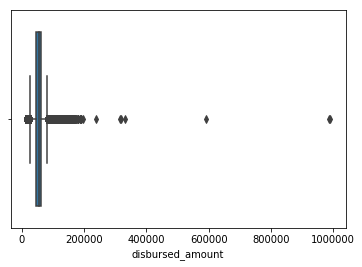

In [6]:
sns.boxplot(train['disbursed_amount'])

In [ ]:
train=train[train['disbursed_amount']<200000].reset_index(drop=True)
train.drop(index = [48879,85588,134575], axis=0, inplace= True)
train.reset_index(inplace= True)
train.drop('index', axis= 1, inplace = True)

### Missing in Employment Type 

In [7]:
train['Employment.Type'].isna().sum()

7661

In [ ]:
df['Employment.Type'].fillna(1, inplace=True)
df['Employment.Type'] = df['Employment.Type'].map({'Salaried':2, 'Self employed':0})

In [ ]:
train['Employment.Type'] = np.where(train['Employment.Type'].isnull(),'Unemployed',train['Employment.Type'])

### Scaling 

In [ ]:
## Standard Scaler 
scaler=StandardScaler()
col=train.columns.difference(['loan_default']).values
train=pd.concat([pd.DataFrame(scaler.fit_transform(train.drop('loan_default',axis=1)),columns=col),train['loan_default'].reset_index(drop=True)],axis=1)
test=pd.DataFrame(scaler.fit_transform(test),columns=col)

In [ ]:
## Quantile Scaler/Transformer
def scale_data(train, test, feats):
    scaler = QuantileTransformer(output_distribution="normal", n_quantiles=2000, subsample=5e5, random_state=12345786)
    df_all = pd.concat([train[feats], test[feats]], axis=0)
    scaler.fit(df_all)
    qnt_feats = [f+"_qnt" for f in feats]
    train_qnt = pd.DataFrame(scaler.transform(train[feats]), columns=qnt_feats)
    test_qnt = pd.DataFrame(scaler.transform(test[feats]), columns=qnt_feats)
    return train_qnt, test_qnt
# feats --> this will contains the lis of features for features transform 
feats = []
train, test = scale_data(train, test, feats)

### Sampling 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_sample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=4700)$")
pass

### Splitting 

In [ ]:
#Creating a training set for modeling and validation set to check model performance
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

#### Stratified Splitting

In [ ]:
X = train.drop(columns=['loan_default'])
y = train['loan_default']
data = pd.concat([X, test], axis = 0)
data['is_test'] = np.zeros(345546)
data.iloc[233154:,-1] = 1
train_examples = train.shape[0]
data_x = data.drop('is_test', axis=1)
data_y = data['is_test']
is_test_probs = cross_val_predict(RandomForestClassifier(max_depth = 7,n_estimators=200), data_x, data_y, method='predict_proba')[:train_examples]
is_test_Probs = is_test_probs[:,1]

from scipy.stats import rankdata
data.iloc[:233154,-1] = rankdata(is_test_Probs)
bins = np.histogram(data.iloc[:233154,-1])[1][:-1]
stratCol = np.digitize(data.iloc[:233154,-1], bins)
x_train = data.iloc[:233154,:]
x_test = data.iloc[233154:,:]

### Training the Model 

In [ ]:
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None, dep=8, seed=0, data_leaf=200):
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = dep
    params["num_leaves"] = 30
    params["min_data_in_leaf"] = data_leaf
    params["learning_rate"] = 0.01
    params["bagging_fraction"] = 0.8
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = seed
    params["bagging_freq"] = 1
    params["bagging_seed"] = seed
    params["lambda_l2"] = 5
    params["lambda_l1"] = 5
    params["verbosity"] = -1
    num_rounds = 20000

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=200, verbose_eval=500)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

    loss = 0
    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        print(loss)
        return model, loss, pred_test_y, pred_test_y2
    else:
        return model, loss, pred_test_y, pred_test_y2

In [ ]:
print("Building model..")
cv_scores = []
pred_test_full = 0
pred_train = np.zeros(train_X.shape[0])
n_splits = 3
#kf = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=7988)
gkf = model_selection.GroupKFold(n_splits=n_splits)
model_name = "lgb"
for dev_index, val_index in gkf.split(train_X, train_df["loan_default"].values, train_df["DisbursalMonth"].values):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]

    pred_val = 0
    pred_test = 0
    n_models = 0.

    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=8, seed=2019)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=7, data_leaf=100, seed=9873)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=9, data_leaf=150, seed=4568)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    pred_val /= n_models
    pred_test /= n_models
    
    loss = metrics.roc_auc_score(val_y, pred_val)
        
    pred_train[val_index] = pred_val
    pred_test_full += pred_test / n_splits
    cv_scores.append(loss)
#     break
print(np.mean(cv_scores))

### Submission Files

In [ ]:
sub_df = pd.DataFrame(test_df[["UniqueID"]])
sub_df["loan_default"] = pred_test_full
sub_df.to_csv("submission.csv", index=False)